In [34]:
# imports
import pandas as pd
import requests
import time
import datetime

In [35]:
# set display options 
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_colwidth', None)

In [36]:
# read in combined csv file
df = pd.read_csv('./data/combined.csv')

In [37]:
df.shape

(39928, 27)

In [38]:
df.head()

,noticeId,title,solicitationNumber,department,subTier,office,postedDate,type,baseType,archiveType,archiveDate,typeOfSetAsideDescription,typeOfSetAside,responseDeadLine,naicsCode,classificationCode,active,award,pointOfContact,description,organizationType,officeAddress,placeOfPerformance,additionalInfoLink,uiLink,links,resourceLinks
0,ffe3c07bab8b4a7d9be583fd4dd96c4a,REQUEST FOR INFORMATION - NEW DESIGN BOOKLET DIE CUTTING INSERT ASSEMBLY,RFI-042720,UNITED STATES GOVERNMENT PUBLISHING OFFICE,UNITED STATES GOVERNMENT PUBLISHING OFFICE,Acquisition Services,2020-04-27,Sources Sought,Sources Sought,auto15,2020-05-27,NaN,NaN,2020-05-12T14:00:00-04:00,333244.0,3610,Yes,NaN,"[{'fax': '', 'type': 'primary', 'email': 'rgraham@gpo.gov', 'phone': '2025120032', 'title': None, 'fullName': 'Rosalyn Graham'}, {'fax': '', 'type': 'secondary', 'email': 'rortega@gpo.gov', 'phone': '2025120803', 'title': None, 'fullName': 'Ronald Ortega'}]",https://api.sam.gov/prod/opportunities/v1/noticedesc?noticeid=ffe3c07bab8b4a7d9be583fd4dd96c4a,OFFICE,"{'zipcode': '20401', 'city': 'Washington', 'countryCode': 'USA', 'state': 'DC'}","{'state': {'code': 'DC', 'name': 'District of Columbia'}, 'zip': '20401', 'country': {'code': 'USA', 'name': 'UNITED STATES'}}",NaN,https://beta.sam.gov/opp/ffe3c07bab8b4a7d9be583fd4dd96c4a/view,"[{'rel': 'self', 'href': 'https://api.sam.gov/prod/opportunities/v1/search?noticeid=ffe3c07bab8b4a7d9be583fd4dd96c4a&limit=1', 'hreflang': None, 'media': None, 'title': None, 'type': None, 'deprecation': None}]","['https://beta.sam.gov/api/prod/opps/v3/opportunities/resources/files/bd2b3b5e86474278ae1ea1a163ccbfd7/download?api_key=null&token=', 'https://beta.sam.gov/api/prod/opps/v3/opportunities/resources/files/774a16e89e4d431e85b0eba1a510a24c/download?api_key=null&token=', 'https://beta.sam.gov/api/prod/opps/v3/opportunities/resources/files/b62d72d82537413f8537bb19160d49bd/download?api_key=null&token=']"
1,ff5e29951ed14b0386ea3291fa6c573f,Audiovisual Suite for Large Auditorium - Maxwell AFB,FA330020X0001,DEPT OF DEFENSE,DEPT OF THE AIR FORCE,FA3300 42 CONS CC,2020-04-27,Sources Sought,Sources Sought,auto15,2020-05-20,NaN,NaN,2020-05-05T12:00:00-05:00,334310.0,5836,Yes,NaN,"[{'fax': '3349532198', 'type': 'primary', 'email': 'brandon.osborne.6@us.af.mil', 'phone': '3349537835', 'title': None, 'fullName': 'Brandon Osborne'}, {'fax': '3349532198', 'type': 'secondary', 'email': 'jeremy.kersey.1@us.af.mil', 'phone': '3349533526', 'title': None, 'fullName': 'Jeremy B. Kersey'}]",https://api.sam.gov/prod/opportunities/v1/noticedesc?noticeid=ff5e29951ed14b0386ea3291fa6c573f,OFFICE,"{'zipcode': '36112-6334', 'city': 'MAXWELL AFB', 'countryCode': 'USA', 'state': 'AL'}","{'city': {'code': '51000', 'name': 'Montgomery'}, 'state': {'code': 'AL', 'name': 'Alabama'}, 'zip': '36112', 'country': {'code': 'USA', 'name': 'UNITED STATES'}}",NaN,https://beta.sam.gov/opp/ff5e29951ed14b0386ea3291fa6c573f/view,"[{'rel': 'self', 'href': 'https://api.sam.gov/prod/opportunities/v1/search?noticeid=ff5e29951ed14b0386ea3291fa6c573f&limit=1', 'hreflang': None, 'media': None, 'title': None, 'type': None, 'deprecation': None}]",['https://beta.sam.gov/api/prod/opps/v3/opportunities/resources/files/c2a6338838ed4ebfa7d70e91221ffc21/download?api_key=null&token=']
2,ff2a16aad70246d1ba10e639c11456d4,Metrology Equipment Move,SP4703-20-Q-0045,DEPT OF DEFENSE,DEFENSE LOGISTICS AGENCY (DLA),DCSO RICHMOND,2020-04-27,Combined Synopsis/Solicitation,Combined Synopsis/Solicitation,auto15,2020-05-19,Total Small Business Set-Aside (FAR 19.5),SBA,2020-05-04T15:00:00-04:00,238990.0,Z1PZ,Yes,NaN,"[{'fax': '', 'type': 'primary', 'email': 'Kiara.leslie@dla.mil', 'phone': '8042796566', 'title': None, 'fullName': 'Kiara Leslie'}, {'fax': '', 'type': 'secondary', 'email': 'mary.washington@dla.mil', 'phone': '8042795628', 'title': None, 'fullName': 'Mary A. Washington, Contracting Officer'}]",https://api.sam.gov/prod/opportunities/v1/noticedesc?noticeid=ff2a16aad70246d1ba10e639c11456d4,OFFICE,"

In [39]:
df.tail()

,noticeId,title,solicitationNumber,department,subTier,office,postedDate,type,baseType,archiveType,archiveDate,typeOfSetAsideDescription,typeOfSetAside,responseDeadLine,naicsCode,classificationCode,active,award,pointOfContact,description,organizationType,officeAddress,placeOfPerformance,additionalInfoLink,uiLink,links,resourceLinks
39923,a2398da2569f4defb99c390d7e728e10,Emergency Equipment Rental Agreement - Mobile Food Draft Specification,SN-2020-14,"AGRICULTURE, DEPARTMENT OF",FOREST SERVICE,USDA FOREST SERVICE,2020-05-15,Special Notice,Solicitation,autocustom,2021-05-21,Total Small Business Set-Aside (FAR 19.5),SBA,2020-05-21T12:00:00-06:00,722310.0,F003,Yes,NaN,"[{'fax': '208-387-5384', 'type': 'primary', 'email': 'larry.robillard@usda.gov', 'phone': '208-387-5682 / 208-407-6003 cell', 'title': 'Contracting Officer', 'fullName': 'Larry J. Robillard'}]",https://api.sam.gov/prod/opportunities/v1/noticedesc?noticeid=a2398da2569f4defb99c390d7e728e10,OFFICE,"{'zipcode': '83705', 'city': 'BOISE', 'countryCode': 'USA', 'state': 'ID'}","{'city': {'code': '8700', 'name': 'Boise'}, 'state': {'code': 'ID', 'name': 'Idaho'}, 'zip': '83709', 'country': {'code': 'USA', 'name': 'UNITED STATES'}}",NaN,https://beta.sam.gov/opp/a2398da2569f4defb99c390d7e728e10/view,"[{'rel': 'self', 'href': 'https://api.sam.gov/prod/opportunities/v1/search?noticeid=a2398da2569f4defb99c390d7e728e10&limit=1'}]",['https://beta.sam.gov/api/prod/opps/v3/opportunities/resources/files/67d915c1a20d4b98ba57afa71c69825f/download?api_key=null&token=']
39924,a22a8028da374702a29aef147c3646cb,6505--GUAIFENESIN,36C77020Q0470,"VETERANS AFFAIRS, DEPARTMENT OF","VETERANS AFFAIRS, DEPARTMENT OF",NATIONAL CMOP OFFICE (36C770),2020-05-15,Presolicitation,Presolicitation,autocustom,2020-06-18,Total Small Business Set-Aside (FAR 19.5),SBA,2020-05-19,325412.0,6505,Yes,{'awardee': {'location': {}}},"[{'fax': None, 'type': 'primary', 'email': 'Kevin.Mahoney3@va.gov', 'phone': None, 'title': None, 'fullName': 'Kevin A Mahoney\nContract Specialist\n913-684-0141'}]",https://api.sam.gov/prod/opportunities/v1/noticedesc?noticeid=a22a8028da374702a29aef147c3646cb,OFFICE,"{'zipcode': '66048', 'city': 'LEAVENWORTH', 'countryCode': 'USA', 'state': 'KS'}",{},NaN,https://beta.sam.gov/opp/a22a8028da374702a29aef147c3646cb/view,"[{'rel': 'self', 'href': 'https://api.sam.gov/prod/opportunities/v1/search?noticeid=a22a8028da374702a29aef147c3646cb&limit=1'}]",NaN
39925,a20ef18783bd455d86d33e266b90844f,"61--CABLE,SPECIAL PURPO",SPE7M120U0401,DEPT OF DEFENSE,DEFENSE LOGISTICS AGENCY (DLA),DLA LAND AND MARITIME,2020-05-15,Award Notice,Award Notice,auto15,2020-05-30,NaN,NaN,NaN,335929.0,61,Yes,"{'date': '2020-05-15', 'number': 'SPE7M120D60RT', 'amount': '250000.00', 'awardee': {'name': 'F & R SALES, INC. DBA MCCAFFREY 109 GAUNTT ST BURLINGTON 08016-1938 US', 'location': {}, 'duns': '604357087', 'cageCode': '1V630'}}","[{'fax': None, 'type': 'primary', 'email': 'Dale.Loney@dla.mil', 'phone': None, 'title': None, 'fullName': 'Dale Loney614-692-3059'}]",https://api.sam.gov/prod/opportunities/v1/noticedesc?noticeid=a20ef18783bd455d86d33e266b90844f,OFFICE,"{'zipcode': '43218-3990', 'city': 'COLUMBUS', 'countryCode': 'USA', 'state': 'OH'}",{},NaN,https://beta.sam.gov/opp/a20ef18783bd455d86d33e266b90844f/view,"[{'rel': 'self', 'href': 'https://api.sam.gov/prod/opportunities/v1/search?noticeid=a20ef18783bd455d86d33e266b90844f&limit=1'}]",NaN
39926,a1d3f34994ca45baa21bffa41dfbd411,Sheridan Lake Emergency Spillway Repair Phase 2,1267T020Q0020,"AGRICULTURE, DEPARTMENT OF",FOREST SERVICE,Black Hills National Forest,2020-05-15,Solicitation,Solicitation,auto15,2020-06-20,Total Small Business Set-Aside (FAR 19.5),SBA,2020-06-05T16:00:00-06:00,237990.0,Z1KA,Yes,NaN,"[{'fax': '6056739217', 'type': 'primary', 'email': 'brenda.oster@usda.gov', 'phone': '6056739322', 'title': None, 'fullName': 'Brenda Oster'}]",https://api.sam.gov/prod/opportunities/v1/noticedesc?noticeid=a1d3f34994ca45baa21bffa41dfbd411,OFFICE,"{'zipcode': '5

In [40]:
# find and drop duplicates
print('Number of duplicated rows:', df.loc[df.duplicated()].shape[0])

Number of duplicated rows: 6


In [41]:
df = df.drop_duplicates()

In [42]:
# check number of rows after removing duplicates

print('Number of rows after removing duplicates:', df.shape[0])

Number of rows after removing duplicates: 39922


In [43]:
# export dataframe into csv file

df.to_csv('./data/combined.csv', index=False)

## EDA

In [44]:
# inspect data
# inspect data

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39922 entries, 0 to 39927
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   noticeId                   39922 non-null  object 
 1   title                      39922 non-null  object 
 2   solicitationNumber         39595 non-null  object 
 3   department                 39915 non-null  object 
 4   subTier                    39847 non-null  object 
 5   office                     39913 non-null  object 
 6   postedDate                 39922 non-null  object 
 7   type                       39922 non-null  object 
 8   baseType                   39922 non-null  object 
 9   archiveType                39922 non-null  object 
 10  archiveDate                39922 non-null  object 
 11  typeOfSetAsideDescription  14199 non-null  object 
 12  typeOfSetAside             14199 non-null  object 
 13  responseDeadLine           32840 non-null  obj

#### Missing Data

In [45]:
import matplotlib.pyplot as plt

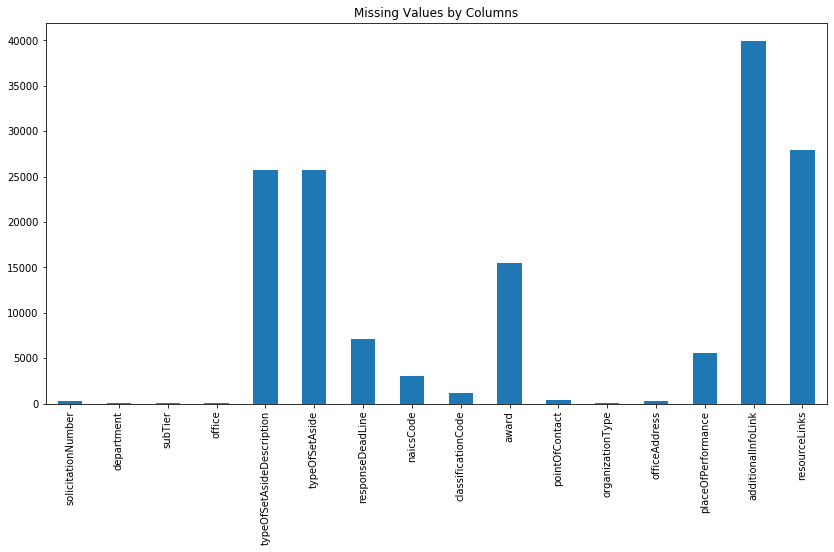

In [46]:
# create a plot that shows columns with missing values

# columns with missing values
cols_w_missings = df.loc[:, df.isna().sum() > 0]

# plot missing data
# set figsize
plt.figure(figsize=(14, 7))
# set title
plt.title('Missing Values by Columns')   
# plot the number of missing values in each column
cols_w_missings.isna().sum().plot(kind='bar');

In [47]:
# prints
print(f'Number of observations: {df.shape[0]}')
print('')
print('Number of missing values:')
for i in range(len(cols_w_missings.columns)):
    print(f'    {cols_w_missings.columns[i]} column\
    = {cols_w_missings[cols_w_missings.columns[i]].isna().sum()}')

Number of observations: 39922

Number of missing values:
    solicitationNumber column    = 327
    department column    = 7
    subTier column    = 75
    office column    = 9
    typeOfSetAsideDescription column    = 25723
    typeOfSetAside column    = 25723
    responseDeadLine column    = 7082
    naicsCode column    = 2983
    classificationCode column    = 1121
    award column    = 15448
    pointOfContact column    = 368
    organizationType column    = 7
    officeAddress column    = 265
    placeOfPerformance column    = 5575
    additionalInfoLink column    = 39922
    resourceLinks column    = 27920


In [48]:
# additionalInfoLink column has no values
# drop additionalInfoLink column
df.drop('additionalInfoLink', axis=1, inplace=True)

**Explore the Type of Award Notices**

In [49]:
# find count unique values of df['type']
df['type'].value_counts(normalize=True)

Combined Synopsis/Solicitation    0.408296
Solicitation                      0.153825
Presolicitation                   0.149166
Award Notice                      0.122439
Sources Sought                    0.083538
Special Notice                    0.059391
Justification                     0.022469
Sale of Surplus Property          0.000877
Name: type, dtype: float64

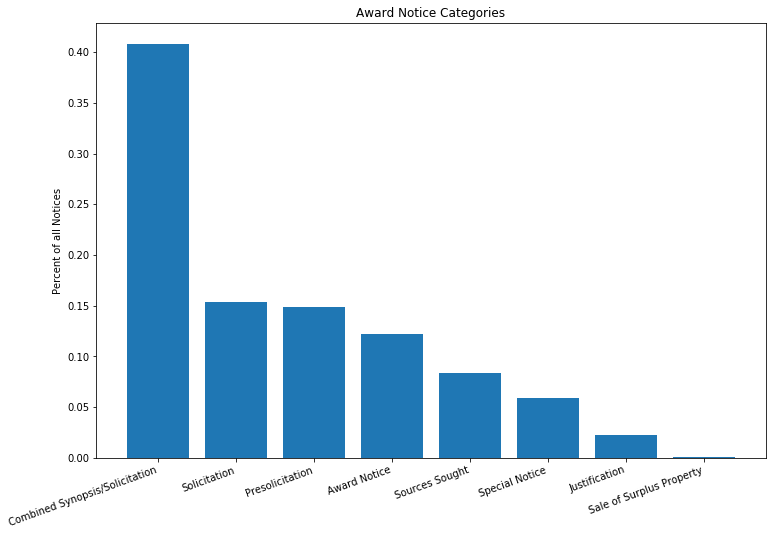

In [50]:
# find count unique values of df['type']

fig = plt.figure(figsize=(12, 8))
plt.title('Award Notice Categories')
plt.xticks(rotation=20, ha='right')
plt.ylabel('Percent of all Notices')
plt.bar(df['type'].value_counts().index, df['type'].value_counts(normalize=True));

# xticks rotation source: https://kite.com/python/answers/how-to-rotate-date-ticks-using-matplotlib-in-python
# xticks alignment source: https://stackoverflow.com/questions/14852821/aligning-rotated-xticklabels-with-their-respective-xticks

In [51]:
# combine solicitation notices with combined synopsis and soliciation notices
# this gives back the percent of notices that solicit applications for award

print(f"Percent of all soliciation notices: \
{round(df['type'].value_counts(normalize=True)['Combined Synopsis/Solicitation'] + df['type'].value_counts(normalize=True)['Solicitation'], 4)}\
")

Percent of all soliciation notices: 0.5621


*Observation:* combined synopsis and solicitation is about 56% of all Notices. When we combine all types of solicitations, 58.7% of all notices is soliciting for a submission. 

*Note:* Special Notice may contain combined sysnopsis and soliciation, and presolicitation may be sources sought. 

**Eplore Notices by Departments**

In [52]:
df['department'].value_counts(normalize=True)

DEPT OF DEFENSE                                                          0.755029
VETERANS AFFAIRS, DEPARTMENT OF                                          0.073481
INTERIOR, DEPARTMENT OF THE                                              0.030189
HOMELAND SECURITY, DEPARTMENT OF                                         0.022398
AGRICULTURE, DEPARTMENT OF                                               0.021471
JUSTICE, DEPARTMENT OF                                                   0.019717
HEALTH AND HUMAN SERVICES, DEPARTMENT OF                                 0.014781
GENERAL SERVICES ADMINISTRATION                                          0.013629
NATIONAL AERONAUTICS AND SPACE ADMINISTRATION                            0.007792
COMMERCE, DEPARTMENT OF                                                  0.007240
TRANSPORTATION, DEPARTMENT OF                                            0.006814
STATE, DEPARTMENT OF                                                     0.006288
ENERGY, DEPARTME

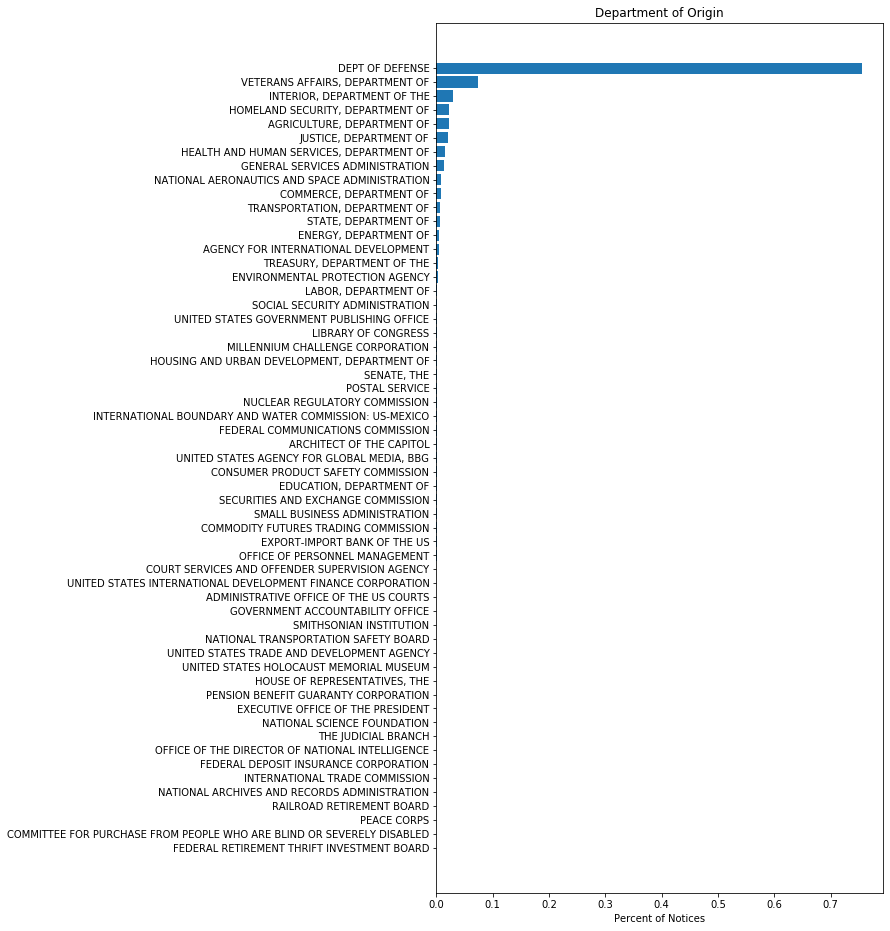

In [53]:
# majority of the notices originated from the Department of Defense
# plot
fig = plt.figure(figsize=(8, 16))
plt.title('Department of Origin')
plt.xlabel('Percent of Notices')
plt.barh(df['department'].value_counts().sort_values().index, 
         df['department'].value_counts(normalize=True).sort_values());


The Department of Defense has far the most award notices. Let's look at what subtiers are active in award solicitation.

In [54]:
# isolate the Department of Defense notices - and break it down by subtiers
df.loc[df['department'] == 'DEPT OF DEFENSE']['subTier'].value_counts(normalize=True)

DEFENSE LOGISTICS AGENCY (DLA)                                   0.537103
DEPT OF THE NAVY                                                 0.182597
DEPT OF THE ARMY                                                 0.169919
DEPT OF THE AIR FORCE                                            0.061961
DEFENSE INFORMATION SYSTEMS AGENCY (DISA)                        0.033619
DEFENSE COMMISSARY AGENCY  (DECA)                                0.001925
DEFENSE ADVANCED RESEARCH PROJECTS AGENCY  (DARPA)               0.001825
US SPECIAL OPERATIONS COMMAND (USSOCOM)                          0.001560
DEPT OF DEFENSE EDUCATION ACTIVITY (DODEA)                       0.001527
US TRANSPORTATION COMMAND (USTRANSCOM)                           0.001361
WASHINGTON HEADQUARTERS SERVICES (WHS)                           0.001228
DEFENSE HEALTH AGENCY (DHA)                                      0.000996
NATIONAL GEOSPATIAL-INTELLIGENCE AGENCY (NGA)                    0.000863
MISSILE DEFENSE AGENCY (MDA)          

In [55]:
# what type of notices are the most common for the Department of Defense
print('What are the most common types of contract notices coming from the Department of Defense?')
df.loc[df['department'] == 'DEPT OF DEFENSE']['type'].value_counts(normalize=True)

What are the most common types of contract notices coming from the Department of Defense?


Combined Synopsis/Solicitation    0.462953
Solicitation                      0.145801
Presolicitation                   0.138700
Award Notice                      0.125527
Sources Sought                    0.063875
Special Notice                    0.042539
Justification                     0.019445
Sale of Surplus Property          0.001161
Name: type, dtype: float64

In [56]:
# find all the combined synopsis/ solicitation notices and the solicitation notices
# output the departments that are soliciting for submission
print('Which department has most often published contract solicitations between March 1 and May 22?')
df.loc[(df['type'] == 'Combined Synopsis/Solicitation') | (df['type'] == 'Solicitation')]['department']\
.value_counts(normalize=True)

Which department has most often published contract solicitations between March 1 and May 22?


DEPT OF DEFENSE                                                0.817667
VETERANS AFFAIRS, DEPARTMENT OF                                0.037349
INTERIOR, DEPARTMENT OF THE                                    0.028881
HOMELAND SECURITY, DEPARTMENT OF                               0.023934
AGRICULTURE, DEPARTMENT OF                                     0.021304
JUSTICE, DEPARTMENT OF                                         0.017471
HEALTH AND HUMAN SERVICES, DEPARTMENT OF                       0.010741
STATE, DEPARTMENT OF                                           0.006106
AGENCY FOR INTERNATIONAL DEVELOPMENT                           0.005215
GENERAL SERVICES ADMINISTRATION                                0.005036
TRANSPORTATION, DEPARTMENT OF                                  0.004635
COMMERCE, DEPARTMENT OF                                        0.004501
ENERGY, DEPARTMENT OF                                          0.003476
NATIONAL AERONAUTICS AND SPACE ADMINISTRATION                  0

In [57]:
# # find all the combined synopsis/ solicitation notices and the solicitation notices
# output the subtiers within departments that are soliciting for submission
print('Which subtier has most often published contract solicitations between March 1 and May 22?')
df.loc[(df['type'] == 'Combined Synopsis/Solicitation') | (df['type'] == 'Solicitation')]['subTier']\
.value_counts(normalize=True)

Which subtier has most often published contract solicitations between March 1 and May 22?


DEFENSE LOGISTICS AGENCY (DLA)                0.511655
DEPT OF THE ARMY                              0.120783
DEPT OF THE NAVY                              0.117618
VETERANS AFFAIRS, DEPARTMENT OF               0.037349
DEPT OF THE AIR FORCE                         0.032313
                                                ...   
ACCTG DISB STA NR 525700                      0.000045
OFFICE OF THE INSPECTOR GENERAL               0.000045
CENTERS FOR MEDICARE AND MEDICAID SERVICES    0.000045
EXPORT-IMPORT BANK OF THE US                  0.000045
DEFENSE CONTRACT MANAGEMENT AGENCY (DCMA)     0.000045
Name: subTier, Length: 126, dtype: float64

In [58]:
# find all award notices
# output frequency by deparments
print('Which department published the most award notice during this year?')
df.loc[df['type'] == 'Award Notice']['department'].value_counts(normalize=True)

Which department published the most award notice during this year?


DEPT OF DEFENSE                                  0.773936
VETERANS AFFAIRS, DEPARTMENT OF                  0.071399
JUSTICE, DEPARTMENT OF                           0.031710
INTERIOR, DEPARTMENT OF THE                      0.026800
GENERAL SERVICES ADMINISTRATION                  0.025368
HOMELAND SECURITY, DEPARTMENT OF                 0.023527
AGRICULTURE, DEPARTMENT OF                       0.019231
HEALTH AND HUMAN SERVICES, DEPARTMENT OF         0.008388
COMMERCE, DEPARTMENT OF                          0.004910
STATE, DEPARTMENT OF                             0.004092
NATIONAL AERONAUTICS AND SPACE ADMINISTRATION    0.002864
ENVIRONMENTAL PROTECTION AGENCY                  0.001637
ENERGY, DEPARTMENT OF                            0.001432
TRANSPORTATION, DEPARTMENT OF                    0.001227
AGENCY FOR INTERNATIONAL DEVELOPMENT             0.000818
LIBRARY OF CONGRESS                              0.000818
LABOR, DEPARTMENT OF                             0.000409
NUCLEAR REGULA

In [59]:
# find all Sources Sought notices
# output frequency by deparments
print('Which department published the most solicitation for interest during this year?')
df.loc[df['type'] == 'Sources Sought']['department'].value_counts(normalize=True)

Which department published the most solicitation for interest during this year?


DEPT OF DEFENSE                                  0.577731
VETERANS AFFAIRS, DEPARTMENT OF                  0.202281
GENERAL SERVICES ADMINISTRATION                  0.033914
HEALTH AND HUMAN SERVICES, DEPARTMENT OF         0.033013
INTERIOR, DEPARTMENT OF THE                      0.030312
HOMELAND SECURITY, DEPARTMENT OF                 0.023409
TRANSPORTATION, DEPARTMENT OF                    0.014406
COMMERCE, DEPARTMENT OF                          0.013505
AGRICULTURE, DEPARTMENT OF                       0.012905
JUSTICE, DEPARTMENT OF                           0.011104
NATIONAL AERONAUTICS AND SPACE ADMINISTRATION    0.011104
ENERGY, DEPARTMENT OF                            0.008403
STATE, DEPARTMENT OF                             0.006002
TREASURY, DEPARTMENT OF THE                      0.005402
SENATE, THE                                      0.003001
AGENCY FOR INTERNATIONAL DEVELOPMENT             0.003001
LABOR, DEPARTMENT OF                             0.002701
ENVIRONMENTAL 

In [60]:
df.head()

,noticeId,title,solicitationNumber,department,subTier,office,postedDate,type,baseType,archiveType,archiveDate,typeOfSetAsideDescription,typeOfSetAside,responseDeadLine,naicsCode,classificationCode,active,award,pointOfContact,description,organizationType,officeAddress,placeOfPerformance,uiLink,links,resourceLinks
0,ffe3c07bab8b4a7d9be583fd4dd96c4a,REQUEST FOR INFORMATION - NEW DESIGN BOOKLET DIE CUTTING INSERT ASSEMBLY,RFI-042720,UNITED STATES GOVERNMENT PUBLISHING OFFICE,UNITED STATES GOVERNMENT PUBLISHING OFFICE,Acquisition Services,2020-04-27,Sources Sought,Sources Sought,auto15,2020-05-27,NaN,NaN,2020-05-12T14:00:00-04:00,333244.0,3610,Yes,NaN,"[{'fax': '', 'type': 'primary', 'email': 'rgraham@gpo.gov', 'phone': '2025120032', 'title': None, 'fullName': 'Rosalyn Graham'}, {'fax': '', 'type': 'secondary', 'email': 'rortega@gpo.gov', 'phone': '2025120803', 'title': None, 'fullName': 'Ronald Ortega'}]",https://api.sam.gov/prod/opportunities/v1/noticedesc?noticeid=ffe3c07bab8b4a7d9be583fd4dd96c4a,OFFICE,"{'zipcode': '20401', 'city': 'Washington', 'countryCode': 'USA', 'state': 'DC'}","{'state': {'code': 'DC', 'name': 'District of Columbia'}, 'zip': '20401', 'country': {'code': 'USA', 'name': 'UNITED STATES'}}",https://beta.sam.gov/opp/ffe3c07bab8b4a7d9be583fd4dd96c4a/view,"[{'rel': 'self', 'href': 'https://api.sam.gov/prod/opportunities/v1/search?noticeid=ffe3c07bab8b4a7d9be583fd4dd96c4a&limit=1', 'hreflang': None, 'media': None, 'title': None, 'type': None, 'deprecation': None}]","['https://beta.sam.gov/api/prod/opps/v3/opportunities/resources/files/bd2b3b5e86474278ae1ea1a163ccbfd7/download?api_key=null&token=', 'https://beta.sam.gov/api/prod/opps/v3/opportunities/resources/files/774a16e89e4d431e85b0eba1a510a24c/download?api_key=null&token=', 'https://beta.sam.gov/api/prod/opps/v3/opportunities/resources/files/b62d72d82537413f8537bb19160d49bd/download?api_key=null&token=']"
1,ff5e29951ed14b0386ea3291fa6c573f,Audiovisual Suite for Large Auditorium - Maxwell AFB,FA330020X0001,DEPT OF DEFENSE,DEPT OF THE AIR FORCE,FA3300 42 CONS CC,2020-04-27,Sources Sought,Sources Sought,auto15,2020-05-20,NaN,NaN,2020-05-05T12:00:00-05:00,334310.0,5836,Yes,NaN,"[{'fax': '3349532198', 'type': 'primary', 'email': 'brandon.osborne.6@us.af.mil', 'phone': '3349537835', 'title': None, 'fullName': 'Brandon Osborne'}, {'fax': '3349532198', 'type': 'secondary', 'email': 'jeremy.kersey.1@us.af.mil', 'phone': '3349533526', 'title': None, 'fullName': 'Jeremy B. Kersey'}]",https://api.sam.gov/prod/opportunities/v1/noticedesc?noticeid=ff5e29951ed14b0386ea3291fa6c573f,OFFICE,"{'zipcode': '36112-6334', 'city': 'MAXWELL AFB', 'countryCode': 'USA', 'state': 'AL'}","{'city': {'code': '51000', 'name': 'Montgomery'}, 'state': {'code': 'AL', 'name': 'Alabama'}, 'zip': '36112', 'country': {'code': 'USA', 'name': 'UNITED STATES'}}",https://beta.sam.gov/opp/ff5e29951ed14b0386ea3291fa6c573f/view,"[{'rel': 'self', 'href': 'https://api.sam.gov/prod/opportunities/v1/search?noticeid=ff5e29951ed14b0386ea3291fa6c573f&limit=1', 'hreflang': None, 'media': None, 'title': None, 'type': None, 'deprecation': None}]",['https://beta.sam.gov/api/prod/opps/v3/opportunities/resources/files/c2a6338838ed4ebfa7d70e91221ffc21/download?api_key=null&token=']
2,ff2a16aad70246d1ba10e639c11456d4,Metrology Equipment Move,SP4703-20-Q-0045,DEPT OF DEFENSE,DEFENSE LOGISTICS AGENCY (DLA),DCSO RICHMOND,2020-04-27,Combined Synopsis/Solicitation,Combined Synopsis/Solicitation,auto15,2020-05-19,Total Small Business Set-Aside (FAR 19.5),SBA,2020-05-04T15:00:00-04:00,238990.0,Z1PZ,Yes,NaN,"[{'fax': '', 'type': 'primary', 'email': 'Kiara.leslie@dla.mil', 'phone': '8042796566', 'title': None, 'fullName': 'Kiara Leslie'}, {'fax': '', 'type': 'secondary', 'email': 'mary.washington@dla.mil', 'phone': '8042795628', 'title': None, 'fullName': 'Mary A. Washington, Contracting Officer'}]",https://api.sam.gov/prod/opportunities/v1/noticedesc?noticeid=ff2a16aad70246d1ba10e639c11456d4,OFFICE,"{'zipcode': '23297-5441', '

In [65]:
df.loc[df['type'] == 'Award Notice'].head()

,noticeId,title,solicitationNumber,department,subTier,office,postedDate,type,baseType,archiveType,archiveDate,typeOfSetAsideDescription,typeOfSetAside,responseDeadLine,naicsCode,classificationCode,active,award,pointOfContact,description,organizationType,officeAddress,placeOfPerformance,uiLink,links,resourceLinks
18,f898813fdf2f499d9db8feebeb267013,Alternate Care Facility (ACF) at Westchester County Center,W912DS20C0010,DEPT OF DEFENSE,DEPT OF THE ARMY,W2SD ENDIST NEW YORK,2020-04-27,Award Notice,Award Notice,autocustom,2020-05-26,NaN,NaN,NaN,236220.0,NaN,Yes,"{'date': '2020-03-26', 'number': 'W912DS20C0010', 'amount': '46971894.64', 'awardee': {'name': 'HAUGLAND ENERGY GROUP LLC', 'location': {'city': {'code': '58442', 'name': 'Plainview'}, 'state': {'code': 'NY', 'name': 'New York'}, 'country': {'code': 'USA', 'name': 'UNITED STATES'}}, 'duns': '078495238', 'cageCode': '7FM79'}}","[{'fax': '', 'type': 'primary', 'email': 'Nicholas.P.Emanuel@usace.army.mil', 'phone': '9177908069', 'title': None, 'fullName': 'Nicholas P. Emanuel'}, {'fax': '', 'type': 'secondary', 'email': 'Alyssa.Tornatore@usace.army.mil', 'phone': '9177908389', 'title': None, 'fullName': 'Alyssa Tornatore'}]",https://api.sam.gov/prod/opportunities/v1/noticedesc?noticeid=f898813fdf2f499d9db8feebeb267013,OFFICE,"{'zipcode': '10278-0004', 'city': 'NEW YORK', 'countryCode': 'USA', 'state': 'NY'}","{'city': {'code': '81677', 'name': 'White Plains'}, 'state': {'code': 'NY', 'name': 'New York'}, 'zip': '10606', 'country': {'code': 'USA', 'name': 'UNITED STATES'}}",https://beta.sam.gov/opp/f898813fdf2f499d9db8feebeb267013/view,"[{'rel': 'self', 'href': 'https://api.sam.gov/prod/opportunities/v1/search?noticeid=f898813fdf2f499d9db8feebeb267013&limit=1', 'hreflang': None, 'media': None, 'title': None, 'type': None, 'deprecation': None}]",NaN
37,efd024a100314e779360a24bbf866472,66--Surveying Equipment,W912QG-20-R-0027,DEPT OF DEFENSE,DEPT OF THE ARMY,W7NZ USPFO ACTIVITY SC ARNG,2020-04-27,Award Notice,Combined Synopsis/Solicitation,autocustom,2020-10-06,NaN,NaN,NaN,NaN,66,Yes,"{'date': '2020-04-27', 'number': 'W912QG20P0018', 'amount': '86483.26', 'awardee': {'name': 'SPEARS, HEATHER A [DUNS: 116721799],9257 W Santa Cruz Ave,Queen Creek AZ 85142', 'location': {}}}","[{'fax': None, 'type': 'primary', 'email': 'marketplacesupport@unisonglobal.com', 'phone': None, 'title': None, 'fullName': 'Name: Marketplace Support, Title: Marketplace Support, Phone: 1.877.933.3243, Fax: 703.422.7822, Email: MarketplaceSupport@unisonglobal.com; '}]",https://api.sam.gov/prod/opportunities/v1/noticedesc?noticeid=efd024a100314e779360a24bbf866472,OFFICE,"{'zipcode': '29201-4763', 'city': 'COLUMBIA', 'countryCode': 'USA', 'state': 'SC'}",{},https://beta.sam.gov/opp/efd024a100314e779360a24bbf866472/view,"[{'rel': 'self', 'href': 'https://api.sam.gov/prod/opportunities/v1/search?noticeid=efd024a100314e779360a24bbf866472&limit=1', 'hreflang': None, 'media': None, 'title': None, 'type': None, 'deprecation': None}]",NaN
103,d600dbcdc9b44f0f8146413efd3cee70,F999--SPCC Management & Lg Qty Contingency Plan (POP: 04/27/20-04/26/21),36C26120Q0488,"VETERANS AFFAIRS, DEPARTMENT OF","VETERANS AFFAIRS, DEPARTMENT OF",261-NETWORK CONTRACT OFFICE 21 (36C261),2020-04-27,Award Notice,Solicitation,autocustom,2020-05-24,Service-Disabled Veteran-Owned Small Business (SDVOSB) Set-Aside (FAR 19.14),SDVOSBC,NaN,541620.0,F999,Yes,"{'date': '2020-04-24', 'number': '36C26120P0902', 'amount': '12497.00000000', 'awardee': {'name': 'ALLIANCE SOLUTIONS GROUP, INC.;11818 ROCK LANDING DR STE 105;NEWPORT NEWS;VA;23606', 'location': {}, 'duns': '184676406', 'cageCode': '36ND9'}}","[{'fax': None, 'type': 'primary', 'email': 'Lynnette.Kawakami@va.gov', 'phone': None, 'title': None, 'fullName': 'Lynnette Kawakami\nLynnette.Kawakami@va.gov'}]",https://api.sam.gov/prod/opportunities/v1/noticedesc?noticeid=d600dbcdc9b44f0f8146413efd3cee70,OFFICE,"{'zipcode': '95655', 'city': 'MATHER', 'countryCode': 'USA', 'state': 'CA'}",{},https:/

In [61]:
# conduct separate EDA of Award Notices - the 'award' column contains information of who got the contract,
# how much, their name and address
# placeOfPerformance column 